# Introduktion til pandas

Pakken `pandas` (https://pandas.pydata.org/) er et Python bibliotek til datahåndtering og dataanalyse. Pandas egner sig særligt til data i tabeller struktureret i rækker og kolonner. En datatabel kaldes inden for pandas en "DataFrame"; et bestemt Python objekt specifikt til at lagre og bearbejde data i tabeller.

Denne lektion gennemgår diverse basale funktioner til at indlæse, udforske og håndtere en pandas DataFrame. Se også den officielle dokumentation for flere guides, introduktioner og beskrivelser til at arbejde med pandas: https://pandas.pydata.org/docs/

## Indlæs data med `pandas`

`pandas` pakken indeholder funktioner til at indlæse data i forskellige formater; herunder CSV, JSON, Excel, Stata, SAS osv.

I det nedenstående indlæses pandas biblioteket, hvorefter datasættet "ESS2014DK_subset.csv" indlæses. Biblioteket `numpy` indlæses også, da det indeholder en række brugbare funktioner til at foretage beregninger på pandas dataframes:

In [1]:
import pandas as pd

ess2018 = pd.read_csv("https://github.com/CALDISS-AAU/course_ndms-I/raw/master/datasets/ESS2018DK_subset.csv")

*Bemærk importkonventionerne for `pandas`. `pandas` typisk som `pd`.*

**Navngivning af datasæt**

Der er forskellige præferencer og holdninger til, hvordan man bør navngive sine objekter. 

Som hovedregel bør man gå efter navne, som både er relativt korte (man kan ende med at skulle skrive det mange gange) og som er sigende for, hvad objektet indeholder.

Dog kan man også argumentere for at navngive meget generisk, sådan at ens kode kan anvendes på andet data.

### Om datasættet
Datasættet, som indlæses her, er et uddrag af datasættet fra European Social Survey (ESS) 2018 (https://www.europeansocialsurvey.org/).

ESS er en europæisk surveyundersøgelse, der gentages hvert andet år. Surveyet behandler spørgsmål om folks helbred, beskæftigelse, politiske holdninger, tillid osv. I dette uddrag er der kun inkluderet de danske respondenter og et mindre udpluk variable.

Subsettet af ESS 2018 indeholder følgende kolonner:

|variable | description |
|----|---|
|idno|Respondent's identification number|
|netustm |Internet use, how much time on typical day, in minutes|
|ppltrst|Most people can be trusted or you can't be too careful|
|vote|Voted last national election|
|prtvtddk|Party voted for in last national election, Denmark|
|lvpntyr|Year first left parents for living separately for 2 months or more|
|tygrtr|Retire permanently, age too young. SPLIT BALLOT|
|gndr|Gender|
|yrbrn|Year of birth|
|edlvddk|Highest level of education, Denmark|
|eduyrs|Years of full-time education completed|
|wkhct|Total contracted hours per week in main job overtime excluded|
|wkhtot|Total hours normally worked per week in main job overtime included|
|grspnum|What is your usual [monthly] gross pay|
|frlgrsp|Fair level of [monthly] gross pay for you|
|inwtm|Interview length in minutes, main questionnaire|


## Inspicer data med `pandas`

Datasættet er nu indlæst som et dataframe objekt i Python, som man kan interagere med. 

Metoden `.head()` printer de første fem rækker af datasættet:

In [2]:
ess2018.head()

,idno,netustm,ppltrst,vote,prtvtddk,lvpntyr,tygrtr,gndr,yrbrn,edlvddk,eduyrs,wkhct,wkhtot,grspnum,frlgrsp,inwtm
0,110,180.0,8.0,Yes,Socialdemokratiet - The Social democrats,1968,Never too young,Male,1949,Kort videregående uddannelse af op til 2-3 års...,9.0,28.0,28.0,NaN,NaN,119.0
1,705,60.0,5.0,Yes,Det Konservative Folkeparti - Conservative Peo...,1976,67,Male,1958,Kort videregående uddannelse af op til 2-3 års...,22.0,37.0,45.0,NaN,NaN,55.0
2,1327,240.0,5.0,NaN,NaN,"Still in parental home, never left 2 months",NaN,Male,2000,Folkeskole 9.-10. klasse,11.0,37.0,37.0,NaN,NaN,37.0
3,3760,300.0,7.0,Not eligible to vote,NaN,"Still in parental home, never left 2 months",40,Male,2002,Folkeskole 9.-10. klasse,9.0,2.0,2.0,200.0,NaN,43.0
4,4658,90.0,8.0,Yes,NaN,1974,50,Female,1956,Kort videregående uddannelse af op til 2-3 års...,4.0,30.0,30.0,NaN,NaN,62.0


Dataframes er et tabulært dataformat. Når en fil indlæses som en pandas dataframe, skal filen derfor være i et format, der kan konverteres til tabelformat (data i rækker og kolonner).

I dette datasæt udgør observationerne (rækkerne) enkeltpersoner, som har besvaret spørgeskemaet. De enkelte kolonner indeholder oplysninger om de enkelte personer. 
Af ovenstående print af de første fem række kan man fx læse, at personen i række 4 (rækkeindeks 3) er en kvinde født i 1958, som er 162 cm høj.

**NaN?**

Som det ses af datasættet fremgår værdien `NaN` flere gange i datasættet (fx under kolonnen `prtvtddk`). 

`NaN` angiver missingværdi. En missingværdi er en ikke-gyldig værdi; fx hvis en person ikke svarer, informationen ikke har været muligt at skaffe eller andet.

### Kolonner/variable 

En dataframe består af en samling af kolonner. En kolonne i en dataframe kaldes en `series`.

Navnene på kolonnerne, som en dataframe indeholder, kan ses af attributen `.columns`:

In [3]:
ess2018.columns

Index(['idno', 'netustm', 'ppltrst', 'vote', 'prtvtddk', 'lvpntyr', 'tygrtr',
       'gndr', 'yrbrn', 'edlvddk', 'eduyrs', 'wkhct', 'wkhtot', 'grspnum',
       'frlgrsp', 'inwtm'],
      dtype='object')

## Inspicer variable

En enkelt variabel/kolonne i datasættet referes til med `[]`:

In [4]:
ess2018['lvpntyr'].head()

0                                           1968
1                                           1976
2    Still in parental home, never left 2 months
3    Still in parental home, never left 2 months
4                                           1974
Name: lvpntyr, dtype: object

Vi kan bruge en metode som `.value_counts()` til at optælle værdierne inden for én kolonne:

In [5]:
ess2018['gndr'].value_counts()

Male      846
Female    726
Name: gndr, dtype: int64

Med funktionen `pd.crosstab()` kan vi opsummere over to variable:

In [6]:
pd.crosstab(ess2018['gndr'], ess2018['prtvtddk'])

prtvtddk,Alternativet - The Alternative,Dansk Folkeparti - Danish People's Party,Det Konservative Folkeparti - Conservative People's Party,Det Radikale Venstre - The Radical Liberal Party,Enhedslisten - Unity List - The Red-Green Alliance,Kristendemokraterne - Christian Democrats,Liberal Alliance - Liberal Alliance,Other,SF Socialistisk Folkeparti - Socialist People's Party,Socialdemokratiet - The Social democrats,"Venstre, Danmarks Liberale Parti - The Liberal Party"
gndr,,,,,,,,,,,
Female,29,64,23,29,47,6,18,7,43,157,138
Male,24,108,29,43,44,9,30,9,30,181,162


# ØVELSE 1: INDLÆS DATA OG INSPICER VARIABLE

1. Indlæs datasættet `ESS2018DK_subset.csv` med `pd.read_csv()`, hvis du ikke allerede har gjort det.

    - Link til data: https://github.com/CALDISS-AAU/course_ndms-I/raw/master/datasets/ESS2018DK_subset.csv
    
2. Tjek at datasættet er indlæst korrekt med `.head()`
3. Brug `.value_counts()` til at finde ud af, hvor mange af respondenterne, der har "Lang videregående uddannelse" som deres højeste fuldførte uddannelse.

# Visualisering med `pandas`

`pandas` dataframes har en række indbyggede metoder til at plotte enkelte variable. 

Plottingfunktionerne bruger pakken `matplotlib`, så gennem denne kan vi indstille størrelsen på plots.

Derudover indlæses `seaborn`, da denne gør graferne pænere.

In [7]:
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline 
sns.set()

plt.rcParams['figure.figsize'] = (20.0, 10.0)

Vi kan fx bruge metoden `.plot.hist()` til at lave et histogram:

<AxesSubplot:ylabel='Frequency'>

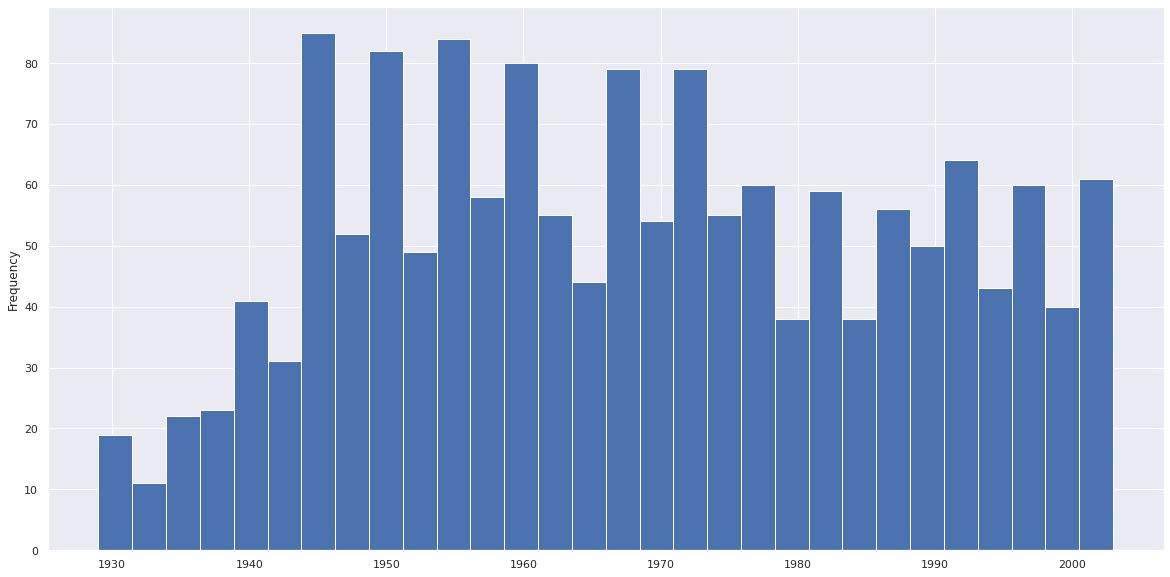

In [8]:
ess2018['yrbrn'].plot.hist(bins = 30)

`.plot.box()` kan bruges til boxplots.

<AxesSubplot:>

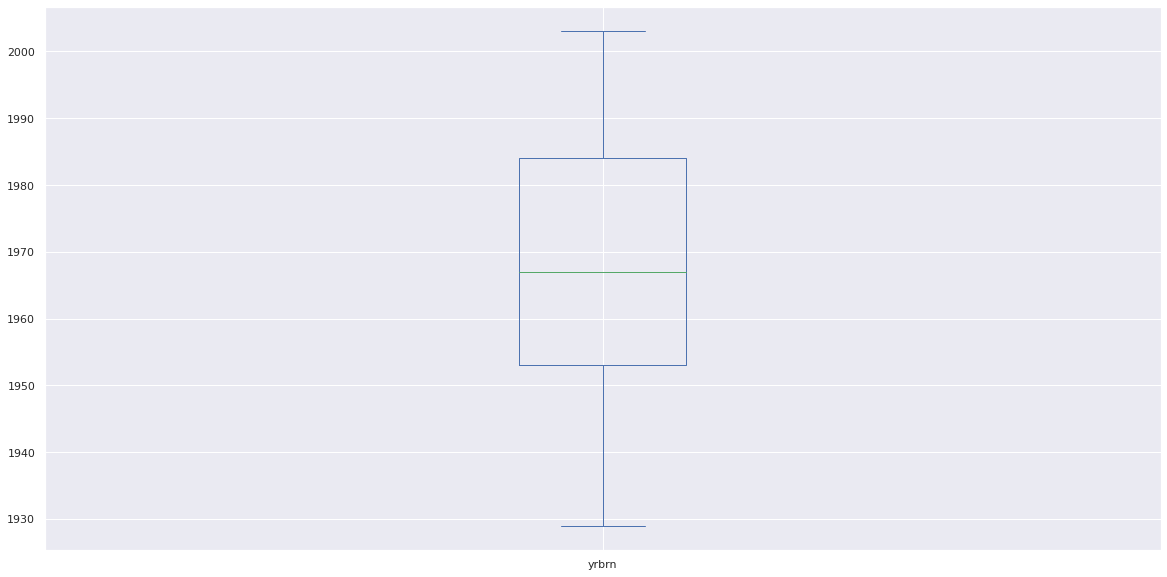

In [9]:
ess2018['yrbrn'].plot.box()

`.plot.bar()` kan bruges til at lave søjlediagrammer over optællinger fra `.value_counts()` :

<AxesSubplot:>

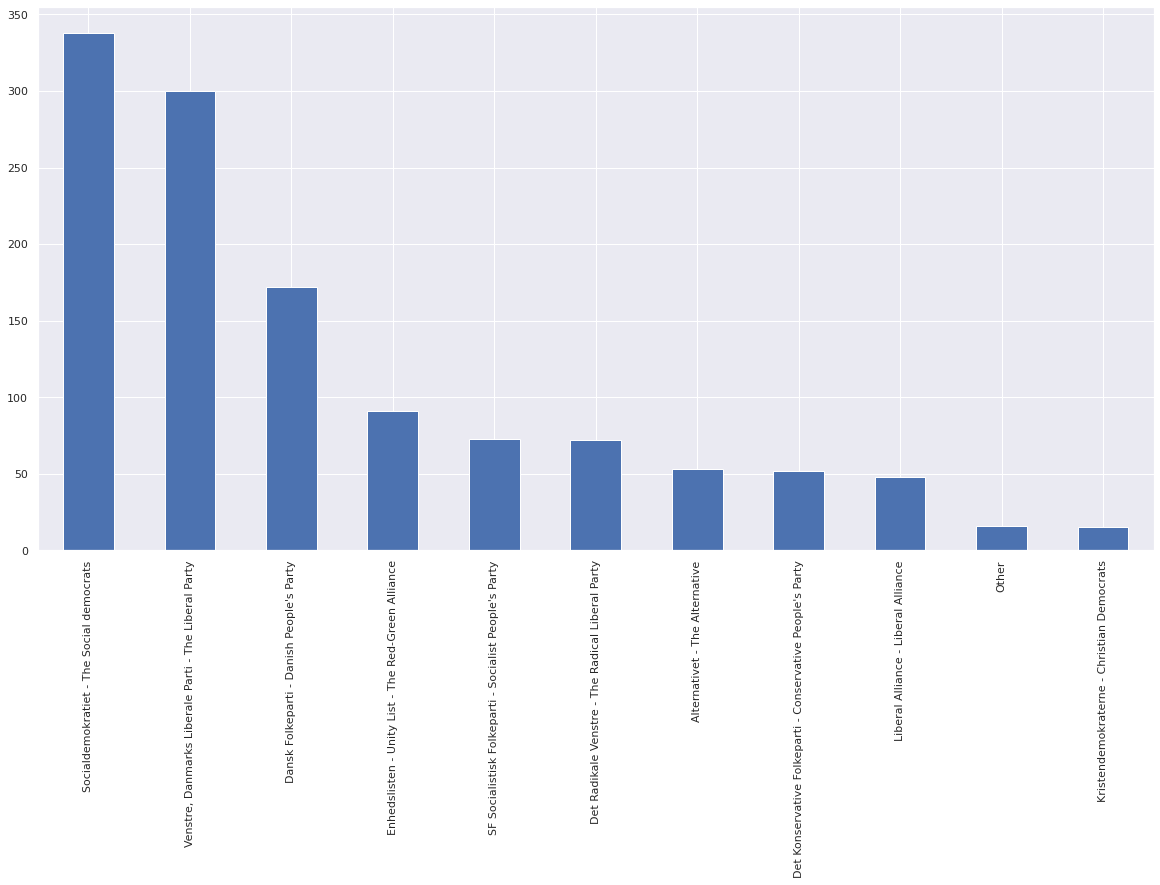

In [10]:
ess2018['prtvtddk'].value_counts().plot.bar()

Alternativt en pie-chart med `.plot.pie()`. Denne kan med fordel kombineres med `.value_counts()`:

<AxesSubplot:ylabel='prtvtddk'>

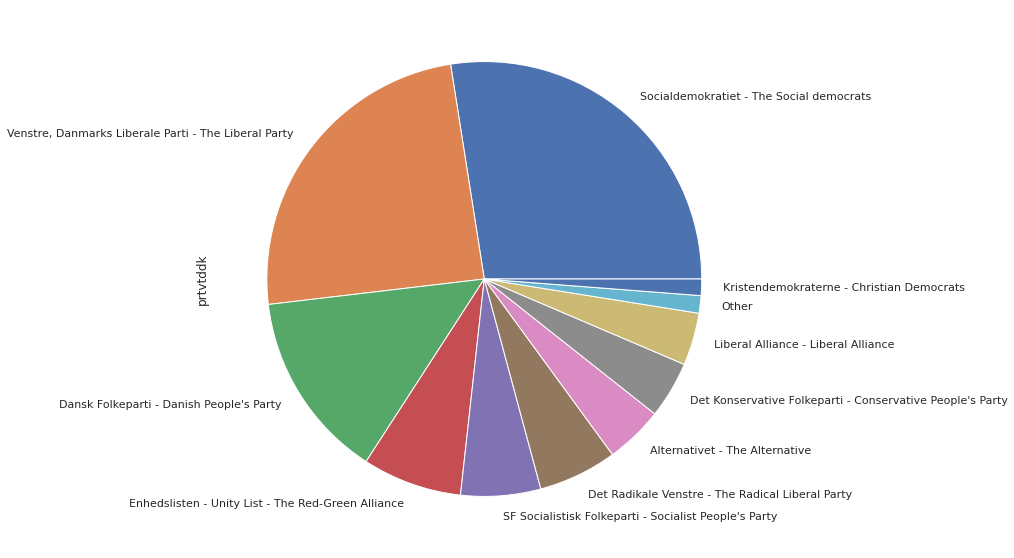

In [11]:
ess2018['prtvtddk'].value_counts().plot.pie()

# ØVELSE 2: VISUALISERING AF DATA

1. Dan et histogram over variablen `grspnum` (selvrapporteret gennemsnitlig månedlige indkomst)
2. Dan et søjlediagram over optællinger over `edlvddk` (højest opnåede uddannelsesniveau)